In [1]:
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '../../'))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from utils import plot_time_series, plot_stack_bar, print_latex_table

In [3]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/home/dell/gcloud_credentials/original-folio-296420-c6835ebfbfe7.json'

In [4]:
df =pd.read_parquet('gs://pacto-report-women/ieer_women/000000000000.parquet')

In [5]:
df['ieer_ponderado'] = df.iloc[:,1:].mean(axis=1)

In [6]:
df=df.sort_values('ano').set_index('ano')

In [7]:
df.columns= ['Não-Liderança','Gerência','Diretoria', 'Ponderado']

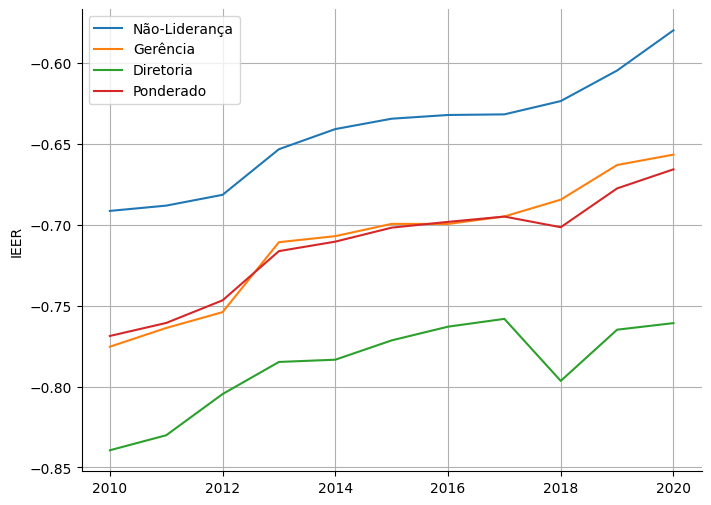

In [8]:
plot_time_series(data=df, 
                 ylabel='IEER',
                 save_path='/home/dell/Documents/pacto/reports/black_women/figures/ieer_black_women.pdf')

In [9]:
df = pd.read_parquet('gs://pacto-report-women/wage_gap/000000000000.parquet')
df=df.sort_values('ano').set_index('ano')
df = df.div(df['Homem_Branca'], axis=0)

df.drop(['Homem_Indigena', 'Mulher_Indigena'], axis=1, inplace=True)

df.columns = ['Homem Negro', 'Mulher Branca', 'Mulher Negra', 'Homem Branco']

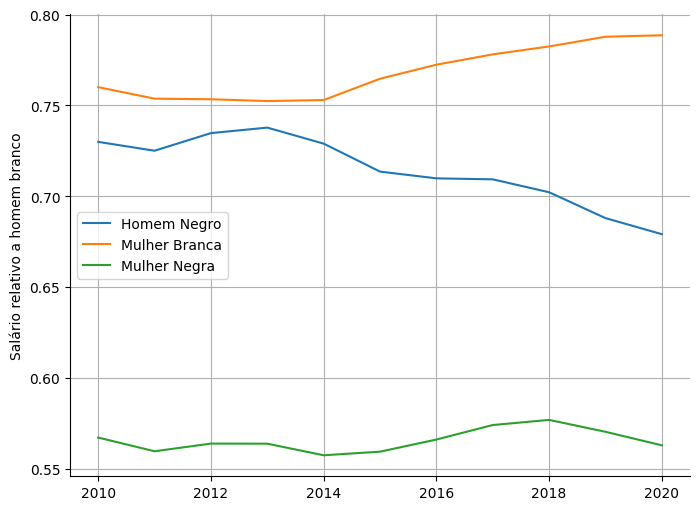

In [10]:
plot_time_series(data=df.iloc[:,:-1], 
                 ylabel='Salário relativo a homem branco',
                 save_path='/home/dell/Documents/pacto/reports/black_women/figures/wage_gap.pdf')

In [11]:
df=pd.read_parquet('gs://pacto-report-women/supply_gap/000000000000.parquet')
df=df.sort_values('ano').set_index('ano')

df = df.div(df['Homem_Branca'], axis=0)

df.drop(['Homem_Indigena', 'Mulher_Indigena'], axis=1, inplace=True)

df.columns = ['Homem Negro', 'Mulher Branca', 'Mulher Negra', 'Homem Branco']

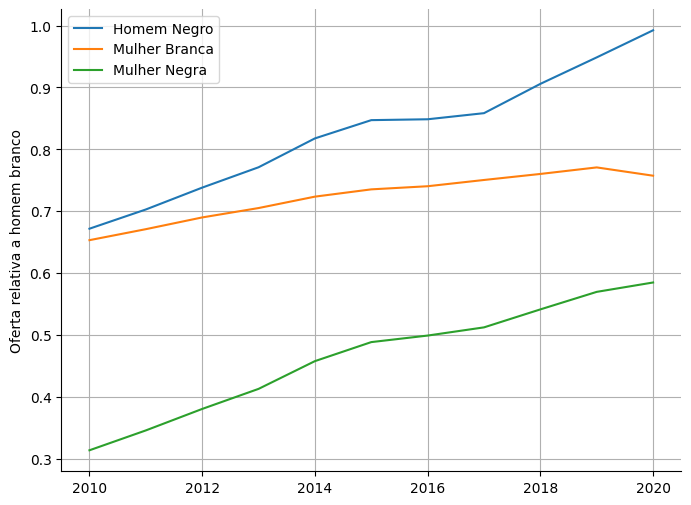

In [12]:
plot_time_series(data=df.iloc[:,:-1], 
                 ylabel='Oferta relativa a homem branco',
                 save_path='/home/dell/Documents/pacto/reports/black_women/figures/supply_gap.pdf')

In [13]:
df=pd.read_parquet('gs://pacto-report-women/education_groups/000000000000.parquet')

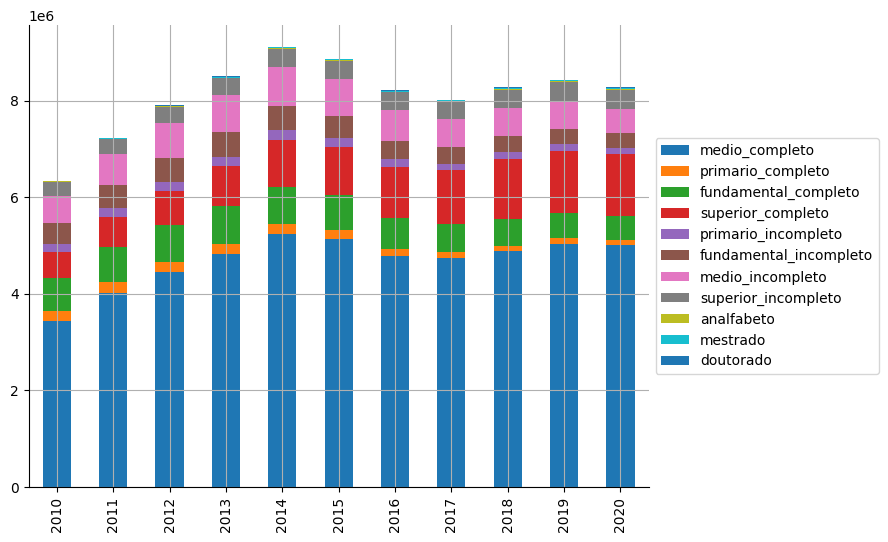

In [14]:
plot_stack_bar(data=df,
               x='ano',
                 save_path='/home/dell/Documents/pacto/reports/black_women/figures/education_all_groups.pdf')

In [15]:
df['fundamental'] = df[['primario_completo', 'fundamental_completo', 
                        'primario_incompleto', 'fundamental_incompleto', 'analfabeto']].sum(axis=1)
df.drop(['primario_completo', 'fundamental_completo', 
                        'primario_incompleto', 'fundamental_incompleto', 'analfabeto'], axis=1, inplace=True)
df['medio']=df[['medio_completo','medio_incompleto']].sum(axis=1)
df.drop(['medio_completo','medio_incompleto'], axis=1, inplace=True)
df['superior'] = df[['superior_completo', 'superior_incompleto','mestrado','doutorado']].sum(axis=1)
df.drop(['superior_completo', 'superior_incompleto','mestrado','doutorado'],axis=1, inplace=True)

In [16]:
df.columns = ['ano', 'Até Fundamental','Ensino Médio','Superior+']

In [17]:
print_latex_table(df.set_index('ano'),
                 save_path='/home/dell/Documents/pacto/reports/black_women/tables/education.tex')

\begin{tabular}{lrrr}
\toprule
{} &  Até Fundamental &  Ensino Médio &  Superior+ \\
ano  &                  &               &            \\
\midrule
2010 &            23.9\% &         63.1\% &      13.0\% \\
2011 &            22.4\% &         64.5\% &      13.1\% \\
2012 &            21.3\% &         65.3\% &      13.4\% \\
2013 &            20.2\% &         65.9\% &      14.0\% \\
2014 &            18.5\% &         66.5\% &      15.0\% \\
2015 &            17.7\% &         66.6\% &      15.8\% \\
2016 &            16.3\% &         66.0\% &      17.7\% \\
2017 &            15.0\% &         66.3\% &      18.7\% \\
2018 &            14.0\% &         65.8\% &      20.1\% \\
2019 &            13.2\% &         66.4\% &      20.4\% \\
2020 &            12.4\% &         66.8\% &      20.8\% \\
\bottomrule
\end{tabular}



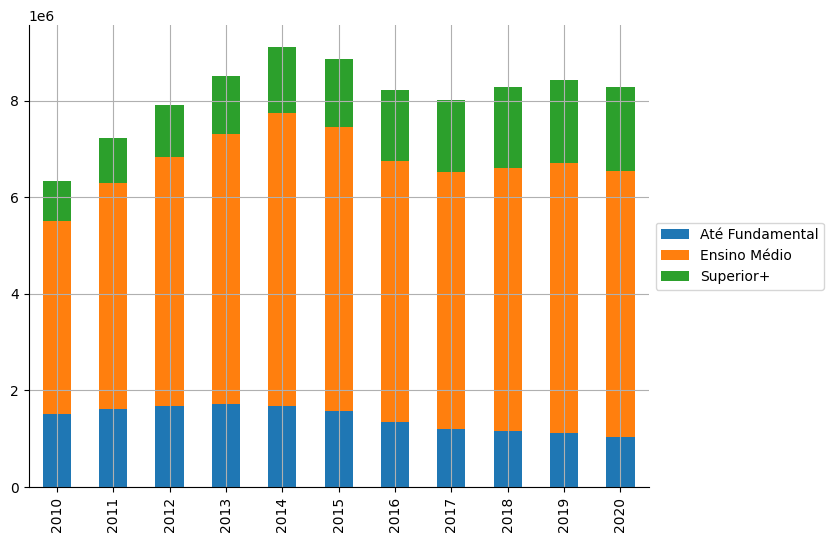

In [18]:
plot_stack_bar(data=df,
               x='ano',
                 save_path='/home/dell/Documents/pacto/reports/black_women/figures/education_main_groups.pdf')